# Check the performances on the Cifar 10 dataset

The implementation has been tested using toy datas, I will now train a model on the Cifar 10 dataset to see how well it can perform.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from src import *
from dataset.data_utils import get_CIFAR10_data
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array

In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))

('y_test: ', (1000,))
('X_train: ', (49000, 3, 32, 32))
('X_test: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))


In [41]:
hidden_layers = [
    Affine_layer(140),
    Relu_layer(),
    Affine_layer(100),
    Relu_layer(),
    Affine_layer(80),
    Relu_layer()
]
std = 5e-2
initialiser = Initialiser(config = {'method': 'normal', 'std_dev': std})

input_size = 32 * 32 * 3
output_size = 10
reg = 0.0015
model = Net(input_size, output_size, hidden_layers=hidden_layers, reg=reg, initialiser=initialiser)

solver = Solver(model, data, lr_decay=0.95, batch_size=100, num_epochs=6, verbose=True, print_every=300)
solver.train()
print(solver.check_accuracy(data['X_test'], data['y_test']))

(Iteration 1 / 2940) loss: 14.262421
(Epoch 0 / 6) train acc: 0.130000; val_acc: 0.134000
(Iteration 301 / 2940) loss: 2.369680
(Epoch 1 / 6) train acc: 0.417000; val_acc: 0.437000
(Iteration 601 / 2940) loss: 2.328210
(Iteration 901 / 2940) loss: 2.215289
(Epoch 2 / 6) train acc: 0.460000; val_acc: 0.428000
(Iteration 1201 / 2940) loss: 1.829608
(Epoch 3 / 6) train acc: 0.495000; val_acc: 0.472000
(Iteration 1501 / 2940) loss: 2.040805
(Iteration 1801 / 2940) loss: 1.834405
(Epoch 4 / 6) train acc: 0.523000; val_acc: 0.489000
(Iteration 2101 / 2940) loss: 1.546633
(Iteration 2401 / 2940) loss: 1.747621
(Epoch 5 / 6) train acc: 0.502000; val_acc: 0.480000
(Iteration 2701 / 2940) loss: 1.487193
(Epoch 6 / 6) train acc: 0.554000; val_acc: 0.494000
0.5


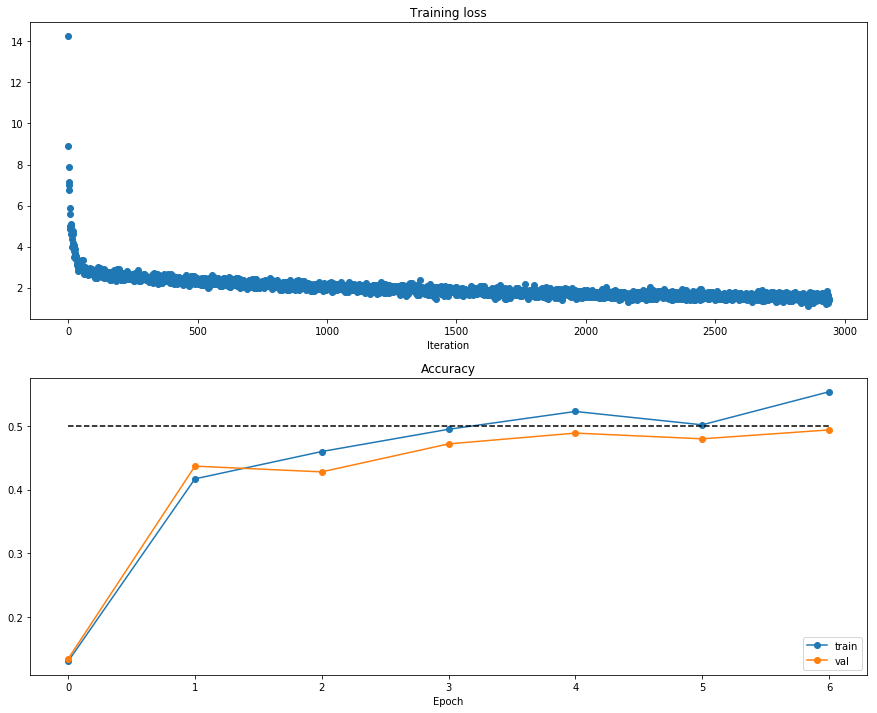

In [42]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

### Analyse of the results

I managed to reach a success rate of 50% on the test datas, using my implementation with the Cifar 10 dataset.
This result is close from the one I reached using the implementation of the CS231N Stanford course in the assignment 2.